# What categories of passengers were most likely to survive the Titanic disaster?

<img src="612cf5089ef1e50018f8af96.jpg" style="width:50; height:50"/>

# Exploration of data

 What categories of passengers were most likely to survive the Titanic disaster?

In [404]:
 df=pd.read_csv("C:/Users/14379/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [405]:
df_original=df.copy()  # copy of original just in case we need raw data.
df.info()# we have missing values in "Age" ,"Cabin" and "Embarked".As the question is about categoriesof passengers who are more likely to survive,"Sex","Age","Pclass"can be appropriate attribute to work on.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [406]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [407]:
#  As survival has value 1 and not survived value 0, we can use the function "sum "to show the total survived people.
# calculate the survived people:
df["Survived"].sum()


342

In [408]:
#Passenger Id entries(total passengers): 891, Survived people: 342
# Percentage of survived: 342/891 *100
342/891 *100
# this is the total percentage of survived people  38.38%

38.38383838383838

In [409]:
# PassengerId does not provide any category because it includes just a number for each passenger as well as Ticket(that includes number ticket), Fare(that is the price of ticket), Name (that includes the name of passengers)and Cabin(number of passenger's cabin)
# I found that "Survived","Pclass","Sex","Age", "SibSp","Parch"and "Embarked " attributes can provide me survived categories that make sense. 

In [410]:
# Embarked has 2 missing as these two do not have sibling/parent/child/spouse we can not do imputation.
a =pd.isnull(df["Embarked"])
df[a]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [411]:
df_Embarked=df.dropna(axis=0,subset=["Embarked"])
df_Embarked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [412]:
df_Embarked[df_Embarked["Survived"]==1]["Embarked"].value_counts()
#C = Cherbourg, Q = Queenstown, S = Southampton
# It shows the passengers from Southampton were more likely to survive.

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [413]:
df[df["Survived"]==1]["Sex"].value_counts()
#"Female"category is more likely to survive.

female    233
male      109
Name: Sex, dtype: int64

In [414]:
df[df["Survived"]==1]["Pclass"].value_counts()
#"class 1" category is most likely to survive

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [415]:
# We can do the top counting by using groupby
df.groupby("Embarked")["Survived"].agg("sum")

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

In [416]:
df.groupby("Sex")["Survived"].agg(["count","sum"])
# As survival has value 1 and not survived value 0, we can use the function "sum "to show the category is survived.

,count,sum
Sex,,
female,314,233
male,577,109


In [417]:
df.groupby("Pclass")["Survived"].agg(["count","sum"])

,count,sum
Pclass,,
1,216,136
2,184,87
3,491,119


In [418]:
# For "Age" we need to fill the missing values and after that use it to see which age or age group are most likely to survive.I did grouping and filling missing values in next question and used here to see which categories were more likely to survive .(30-39)

#As "Cabin"attribute has a lot of missing and it is not an important category for our report we can drop this column.I did in question 4
# "Embarked" attribute has 2 missing values that I fixed on top.

In [419]:
 df_2.groupby("Age_Group")["Survived"].agg("sum").sort_values(ascending=False)
    # age- group 20-29 were more likely to survive.


Age_Group
20-29    77
30-39    73
10-19    41
0-9      38
40-49    34
50-59    20
>=60      7
Name: Survived, dtype: int64

In [420]:
df_1.groupby("Age_Group")["Survived"].agg("sum").sort_values(ascending=False)
# age- group 20-29 were more likely to survive.


Age_Group
20-29    77
30-39    73
10-19    41
0-9      38
40-49    34
50-59    20
>=60      7
Name: Survived, dtype: int64

# Verifying the other attributes 

In [421]:
#  I verified each attribute and its categories to see which group were more likely to survive. I found category Female in "sex",class1 in "Pclass", Southampton in"Embarked"and age_group (30-39)were more likely to survive. In this question I decide to use three categories that make sense more for my analsis:SEX,Age_group and class.

# The reason to choose these attribute are they can be important factor for a analysis report.Knowing which sex in which group_range and in which class were more likely to survive provide valuable information of this disaster that other attribute like ticket ,fare,embarked or name ,Id do not.

In [422]:
df_1.groupby(["Sex","Pclass","Age_Group"])["Survived"].agg("sum").sort_values(ascending=False)
# Female in class1 in 30-39 age_group were more likely to survive.

Sex     Pclass  Age_Group
female  1       30-39        27.0
        2       20-29        22.0
male    3       20-29        16.0
female  2       30-39        16.0
        1       20-29        15.0
        3       20-29        15.0
        1       40-49        13.0
        3       10-19        13.0
        1       10-19        13.0
male    1       30-39        12.0
female  3       0-9          11.0
        1       50-59        11.0
male    1       40-49         9.0
                20-29         9.0
female  2       40-49         9.0
male    2       0-9           9.0
female  2       10-19         8.0
male    3       0-9           8.0
                30-39         8.0
female  2       0-9           8.0
        3       30-39         7.0
        2       50-59         5.0
male    1       50-59         4.0
        3       10-19         4.0
female  1       >=60          3.0
male    2       30-39         3.0
        1       10-19         2.0
                >=60          2.0
        3       40-49 

# Feature Engineering

In [423]:
# As it is clear having single age provide messy analysis that can't be useful and adding group age help to have more practical analysis.The age-group decreased the number of rows in analysis and at the same time we can compare in each range of age how many people survived,actually we assump passengers in every group have the same specifications.
#As the "Cabin"attribute has a lot of missing features and it is not an important category for our analysis,we can drop this column.

In [424]:
#Messy analysis
survived=df[df["Survived"]==1]
survived.loc[:,["Age",'Sex',"Pclass"]]

,Age,Sex,Pclass
1,38.0,female,1
2,26.0,female,3
3,35.0,female,1
8,27.0,female,3
9,14.0,female,2
...,...,...,...
875,15.0,female,3
879,56.0,female,1
880,25.0,female,2
887,19.0,female,1


In [425]:
# We can group age to avoid messy looking and have a more accurate category as the surviving group.
bins = [0,10,20,30,40,50,60,81]
bin_labels = ['0-9','10-19', '20-29', '30-39', '40-49', '50-59','>=60']
df["Age_Group"] = pd.cut(df["Age"], bins, right=False, labels = bin_labels) 
df_1["Age_Group"] = pd.cut(df["Age"], bins, right=False, labels = bin_labels)
df_2["Age_Group"] = pd.cut(df["Age"], bins, right=False, labels = bin_labels) 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age_Group    714 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.9+ KB


In [426]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20-29
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,10-19
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,20-29


# Missing values

In [428]:
#attribut "Cabin"has a lot of missing values and as it does not provide useful information we can remove it.
df.drop("Cabin",axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,20-29
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,10-19
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,20-29


In [430]:
# for imputing missing values in Age attribute I choose two ways . df_1 is that way I impute mean value of passenger who has the same sex,same Number of SiP and Parch(same number of parent,spouse,sibiling and children)and see how it works.
df_1=df_original.copy()
df_mean=df_1.groupby(["Sex","SibSp","Parch"])["Age"].transform("mean")
df_mean

0      32.311321
1      31.806122
2      30.150000
3      31.806122
4      32.901316
         ...    
886    32.901316
887    30.150000
888    21.200000
889    32.901316
890    32.901316
Name: Age, Length: 891, dtype: float64

In [432]:
#After imputation we have still 7 missing values because maybe there are one group of same sex,SiSp and Parch that the age is missing for them. For these 7 missing I just consider the mean of same sex.
df_1["Age"].fillna(df_mean,inplace=True)
df_1["Age"].isnull().sum()


7

In [434]:
df_mean2=df_1.groupby(["Sex"])["Age"].transform("mean")
df_1["Age"].fillna(df_mean2,inplace=True)
df_1["Age"].isnull().sum()

0

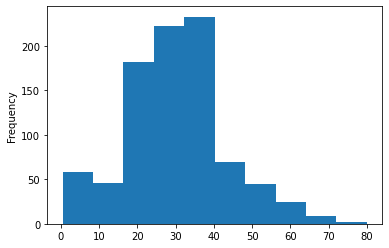

In [435]:
#I am going to compare by using plot to see how imputation missing values change the original plot.
df_1["Age"].plot(kind="hist")

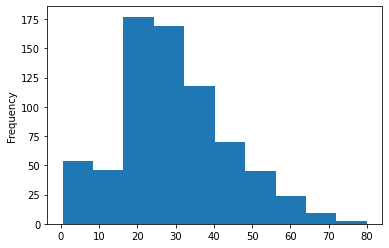

In [121]:
df_original["Age"].plot(kind="hist")

In [436]:
df_1["Age"].isnull().sum()

0

In [437]:
df_original["Age"].isnull().sum()

177

In [444]:
#we can simply compare the imputation result before and after imputation
df_compare = pd.DataFrame({"Before Imputation":df_original["Age"],"After Imputation":df_1["Age"]})
df_compare
   

,Before Imputation,After Imputation
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,21.2
889,26.0,26.0


In [450]:
#Second way of imputation can be imputing mean age of group who has same sex and same class.
# age- group 20-29 were more likely to survive.
df_2=df_original.copy()
df_2["Age"].isnull().sum()

177

In [451]:
# After imputation in this way there is no more missing value.
df_mean3=df_2.groupby(["Sex","Pclass"])["Age"].transform("mean")
df_2["Age"].fillna(df_mean3,inplace=True)
df_2["Age"].isnull().sum()

0

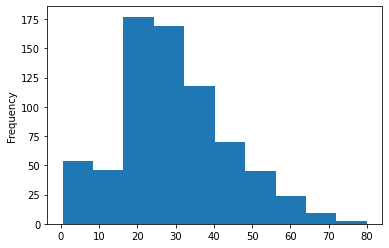

In [452]:
# in de_2 the plot and comparison of values show us this imputation can be a good choice.
df_original["Age"].plot(kind="hist")


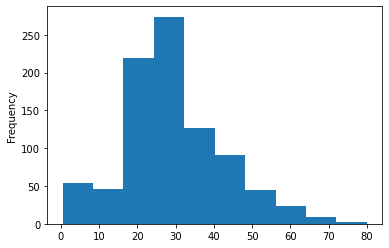

In [453]:
df_2["Age"].plot(kind="hist")

In [141]:
df_compare = pd.DataFrame({"Before Imputation":df_original["Age"],"After Imputation":df_2["Age"]})
df_compare

,Before Imputation,After Imputation
0,22.0,22.00
1,38.0,38.00
2,26.0,26.00
3,35.0,35.00
4,35.0,35.00
...,...,...
886,27.0,27.00
887,19.0,19.00
888,NaN,21.75
889,26.0,26.00


In [465]:
# I try sex,SibSp,Parch,Pclass together for imputatio to see if it works:
df_3=df_original.copy()
df_3["Age"].isnull().sum()

177

In [459]:
df_mean4=df_3.groupby(["Sex","SibSp","Parch","Pclass"])["Age"].transform("mean")
df_3["Age"].fillna(df_mean4,inplace=True)
df_3["Age"].isnull().sum()

8

In [461]:
df_mean5=df_3.groupby(["Sex","Parch","SibSp"])["Age"].transform("mean")
df_3["Age"].fillna(df_mean5,inplace=True)
df_3["Age"].isnull().sum()

0

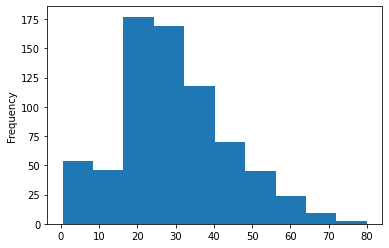

In [462]:
df_original["Age"].plot(kind="hist")

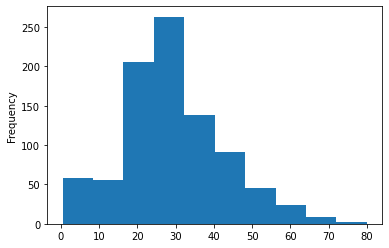

In [463]:
df_3["Age"].plot(kind="hist")

In [464]:
df_compare = pd.DataFrame({"Before Imputation":df_original["Age"],"After Imputation":df_3["Age"]})
df_compare

,Before Imputation,After Imputation
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,14.346939
889,26.0,26.000000
